<div style="width: 100%; clear: both;">
<div style="float: left; width: 30%;">
<img src="https://www.utpl.edu.ec/sites/default/files/archivos/marca%20UTPL%202018-02.png", align="left" width="280" height="120">
</div>
</div>
<div style="float: right; width: 70%;">
<p style="margin: 0; padding-top: 32px; text-align:right; color:#003366; font-size:16px"><u>Análisis de datos y visualización</u></p>
<p style="margin: 0; text-align:right; color:#999999; font-size:17px">Maestría en Inteligencia Artificial Aplicada</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>


# Laboratorio 2: Limpieza y preprocesamiento de datos

<b>Integrantes:</b>
- MARIA PETRONILA JUAREZ ILLESCAS
- JAIME FABRICIO PAREDES MUÑOZ

<b>Objetivo de la práctica:</b>

La segunda actividad práctico-experimental tiene como objetivo:

- Aplicar técnicas de EDA y de preprocesamiento de datos para dejar listo un dataset para el análisis predictivo.

Para cumplir el objetivo mencionado, desarrolle los ejercicios planteados en el presente notebook. Por cada ejercicio revise las indicaciones proporcionadas, para conseguir así el resultado que se espera.

<b>Sobre el desarrollo:</b>

La actividad puede ser desarrollada en grupos de hasta dos integrantes o de forma individual. Si el trabajo se desarrollo en grupos, al momento de subir el entregable, indicar los nombres.

<b>Entregable de la actividad:</b>

En la tarea habilitada, suba el notebook con la solución (en formato <b>html</b> o <b>pdf</b>). Antes de subir la solución verifique que consten todas las salidas que se esperan de cada ejercicio.


## Parte 1: Carga del Dataset


A partir del archivo disponible en este enlace [https://www.kaggle.com/datasets/slmsshk/medical-students-dataset/data]

<b>Descripción del Dataset:</b>

The dataset consists of the following columns:

    - StudentID: Unique identifier for each medical student.
    - Gender: Gender of the student (e.g., Male, Female).
    - Country: Birth country of student.
    - Age: Age of the student in years.
    - Ethnicity: Ethnicity of the student.
    - Year: Academic year of the student.
    - University: Name of the university where the student is enrolled.
    - GPA: Grade Point Average of the student.
    - MCAT Score: Medical College Admission Test (MCAT) score of the student.
    - Clinical Experience: Indicator of whether the student has previous clinical experience (Yes/No).
    - Research Experience: Indicator of whether the student has previous research experience (Yes/No).
    - Publication Count: Number of publications attributed to the student.
    - Exam Score: Performance score on a standardized medical examination.

   

In [4]:
# Carga de librerías
import kaggle
import pandas as pd
import numpy as np
import seaborn as sns #new
import matplotlib.pyplot as plt
import math #new
from sklearn.preprocessing import OneHotEncoder # new
import os
import itertools
import time
from PIL import Image
from IPython.core import display as ICD
%matplotlib inline

In [5]:
#Cargar lista de palabras clave:
data = pd.read_csv('medical_students_dataset.csv') # archivo sin encabezado

data.sample()

,Student ID,Birthdate,Gender,Country,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
88,88987.0,2005-09-01,Male,USA,156.532535,77.442306,O,31.605964,98.343758,84.0,133.0,NaN,No,No


## Parte 2: EDA del dataset propuesto (3.5)

<div style="background-color: 000000; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">


<b>Objetivo:</b> Seleccionar y aplicar las técnicas EDA (estadísticas, visuales, univariantes y multivariantes) más apropiadas para el caso presentado. La aplicación debe orientarse a entender la estructura del dataset y a determinar posibles problemas de calidad en los datos porque en el siguiente apartado se pedirá enfocarse en arreglar estos problemas.

<b>Tareas a realizar:</b> Las siguientes tareas son orientativas, se pueden añadir otras relacionadas con el EDA que ayuden a cumplir los objetivos de esta primera parte de la práctica.

- Verificar tipos de datos: identificar potenciales problemas por cada atributo.
- Aplicar resúmenes de datos (estadísticos y visuales) que ayuden a determinar:
  - Naturaleza/distribución/dispersión de datos.
  - Qué conjuntos de datos (variables) se deben limpiar o transformar.
  - La presencia de valores faltantes y atípicos.

<b> Recomendación</b> Intente construir funciones que pueda reusar para analizar diferentes variables.

<b>Salida esperada:</b> 

- Medidas estadísticas y visuales de las variables del dataset. Comentar los aspectos más relevantes.
- Lista del estado de calidad de datos: variable por variable. Por ejemplo:
    - La variable "Gender" debe ser consolidada para integrar categorías equivalentes como Woman-Female, etc.
</div>


### Paso 2.1: Aplicación de EDA (2 puntos)

Para que tenga una idea inicial, a continuación, se explora el dataset mostrando un resumen general de sus atributos. Más adelante, analice variable por variable para conocer su naturaleza y potenciales problemas de calidad.

In [6]:
print('Dimensión del dataset: ', data.shape, "\n")
data.info() 

Dimensión del dataset:  (43040, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      38712 non-null  object 
 1   Birthdate       38739 non-null  object 
 2   Gender          38688 non-null  object 
 3   Country         43034 non-null  object 
 4   Height          38711 non-null  float64
 5   Weight          38729 non-null  float64
 6   Blood Type      38666 non-null  object 
 7   BMI             38716 non-null  float64
 8   Temperature     38607 non-null  float64
 9   Heart Rate      38688 non-null  float64
 10  Blood Pressure  38666 non-null  float64
 11  Cholesterol     38711 non-null  float64
 12  Diabetes        38738 non-null  object 
 13  Smoking         38673 non-null  object 
dtypes: float64(7), object(7)
memory usage: 4.6+ MB


Observe los tipos de datos de cada variable y analice:
- ¿Qué variables tienen incorrectamente asociado el tipo de dato?
- El dataset tiene 43040 instacias, pero observe la tabla resumen anterior y encontrará la presencial de valores perdidos.

Más adelante, en la <b>parte 2.2</b>, podrá comentar los hallazgos encontrados en este punto.

Student ID, Birthdate, Diabetes, Smoking; estas son variables que tienen definiciones de tipos de datos distintos a su naturaleza.
Estos son  los tipos de datos que deberian poseer:
Student ID   Entero
Birthdate    Fecha
Diabetes y Smoking Booleano

Existen mucho valores NaN, incluyendo en la variable Student ID.

In [7]:
data.describe() # resumen de variables numéricas

,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,38711.000000,38729.000000,38716.000000,38607.000000,38688.000000,38666.000000,38711.000000
mean,174.980550,69.964809,23.320104,98.584010,79.518791,114.437620,184.697244
std,14.511033,17.352552,7.074468,1.359443,11.554133,14.594187,37.514069
min,150.000329,9.525856,-1.000000,9.745177,60.000000,0.000000,0.000000
25%,162.402929,55.003037,17.821714,98.267914,70.000000,102.000000,153.000000
50%,174.921860,69.953783,22.608323,98.602929,79.000000,115.000000,184.000000
75%,187.558080,85.015798,27.980556,98.940652,90.000000,127.000000,217.000000
max,351.618589,99.995744,103.928083,100.824857,99.000000,139.000000,249.000000


En la tabla anterior, observe los valores mínimos y máximos de cada variable numérica; esto le dará una idea de potenciales problemas de calidad de los datos. Como referencia, puede considerar los siguientes valores dentro de lo "normal":

  - Weight > 40 (kg.)
  - En temperatura: como valores válidos se pueden considerar en el rango de: 97 - 101 grados Farenheit.
  - En BMI de 10 a 45.
  - Cholesterol > 120.
  - Blood Pressure 	 > 90.

Para los valores que estén fuera del rango indicado, podría marcarlos como NaN.

Además, considere que algunas variables categóricas deben tener ciertos valores dentro de un dominio posible, por ejemplo:
  - En blood type: los valores válidos son A, B, AB y O. Los valores como O+, O-, o OR+... pueden ser "homologados" como O. Los demás valores que no encajen en estas categorías globales podrían ser catalogadas como NaN.

En función de lo comentado, a continuación realice una exploración más exhaustiva, para comprobar el comportamiento y estado de cada variable.

Resumen estadístico de variables numéricas:
             Height        Weight           BMI   Temperature    Heart Rate  \
count  38711.000000  38729.000000  38716.000000  38607.000000  38688.000000   
mean     174.980550     69.964809     23.320104     98.584010     79.518791   
std       14.511033     17.352552      7.074468      1.359443     11.554133   
min      150.000329      9.525856     -1.000000      9.745177     60.000000   
25%      162.402929     55.003037     17.821714     98.267914     70.000000   
50%      174.921860     69.953783     22.608323     98.602929     79.000000   
75%      187.558080     85.015798     27.980556     98.940652     90.000000   
max      351.618589     99.995744    103.928083    100.824857     99.000000   

       Blood Pressure   Cholesterol  
count    38666.000000  38711.000000  
mean       114.437620    184.697244  
std         14.594187     37.514069  
min          0.000000      0.000000  
25%        102.000000    153.000000  
50%        115.0

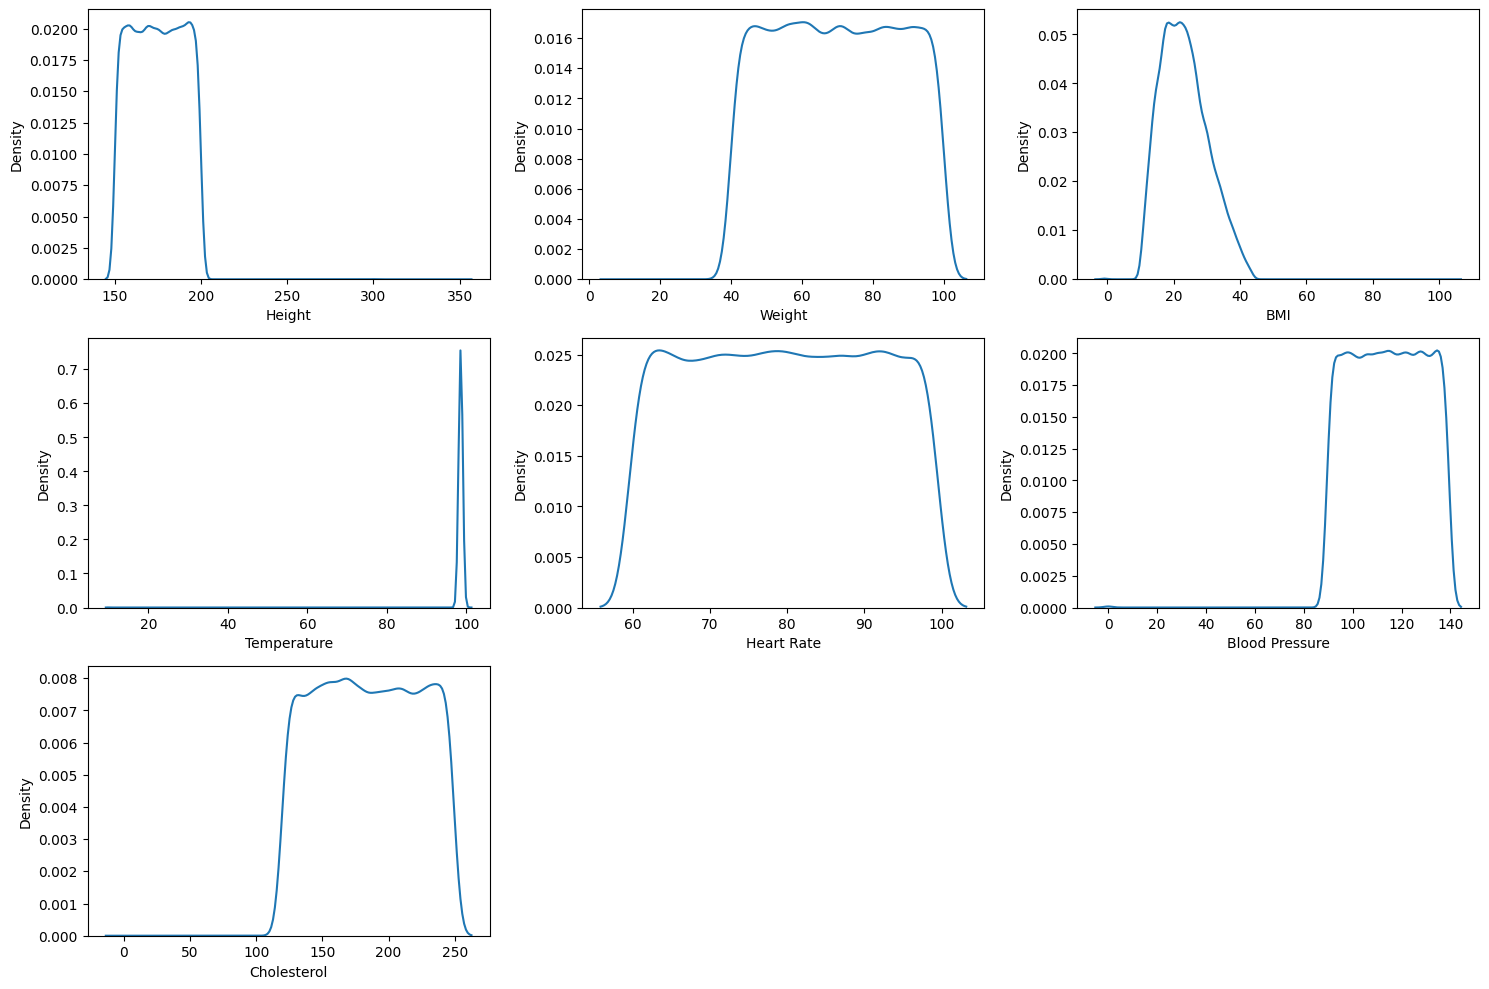

Distribución de variables numéricas:


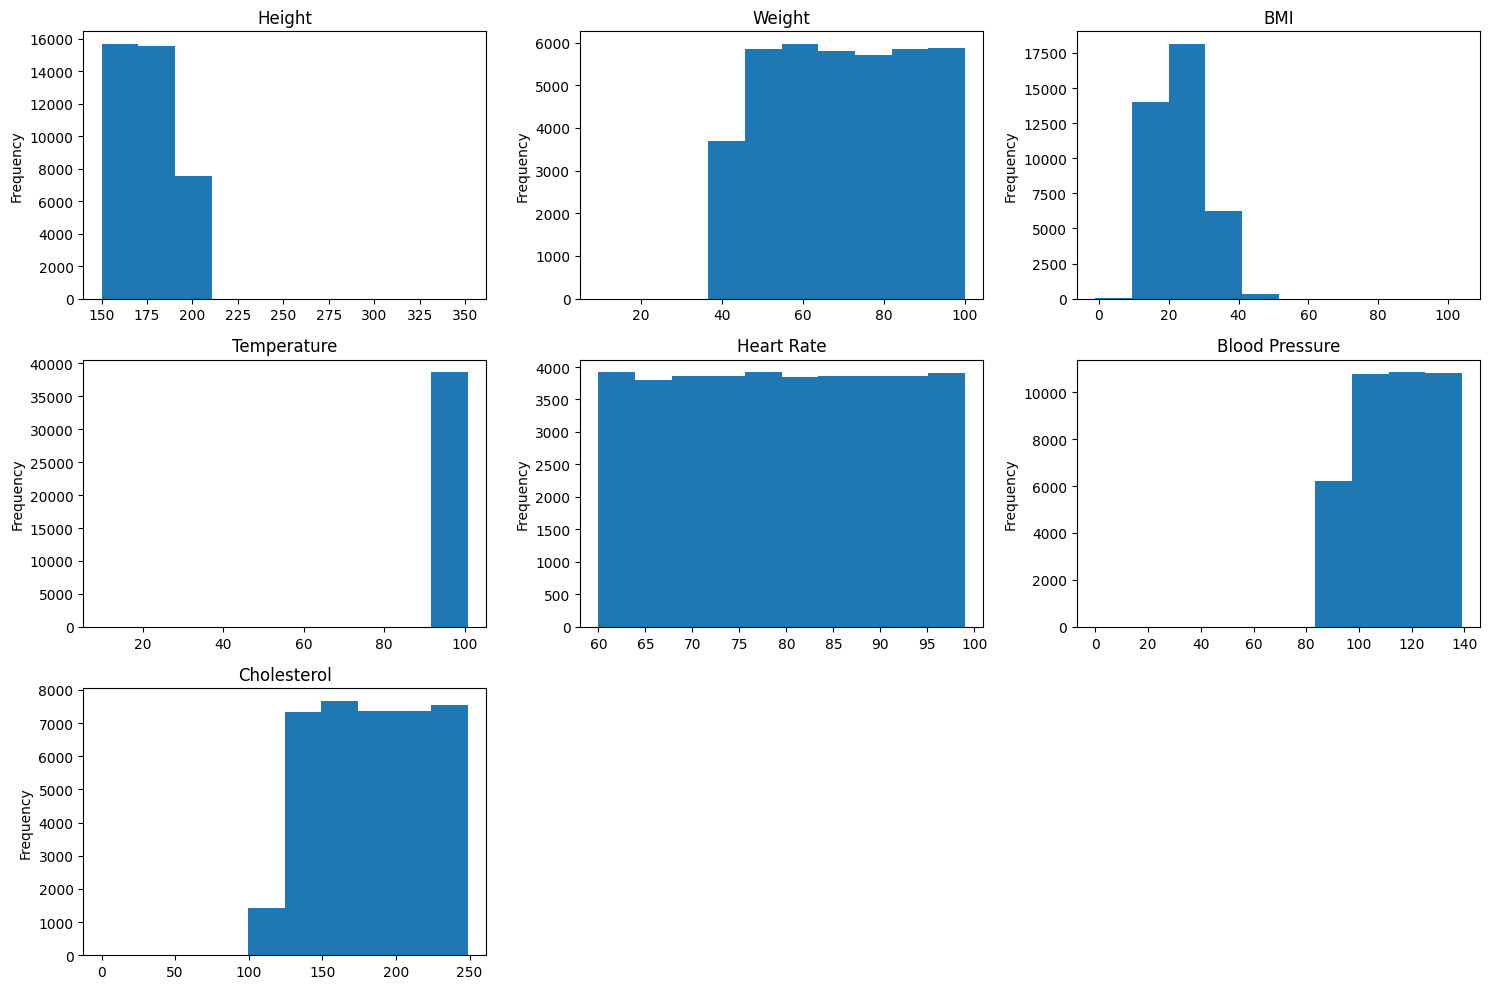

Mapa de calor de valores faltantes:


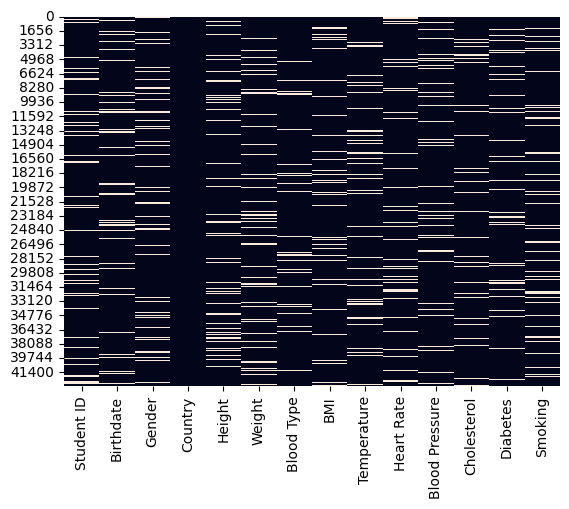

Boxplot de variables numéricas:


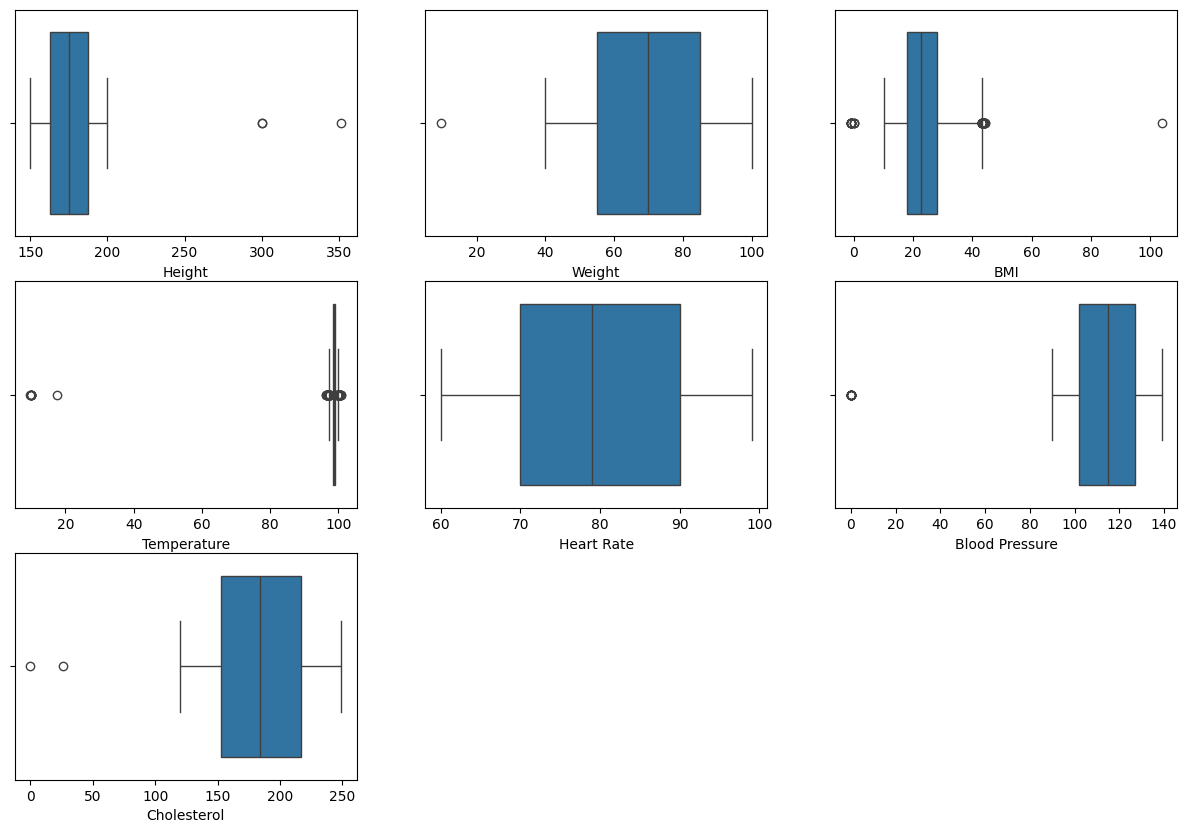

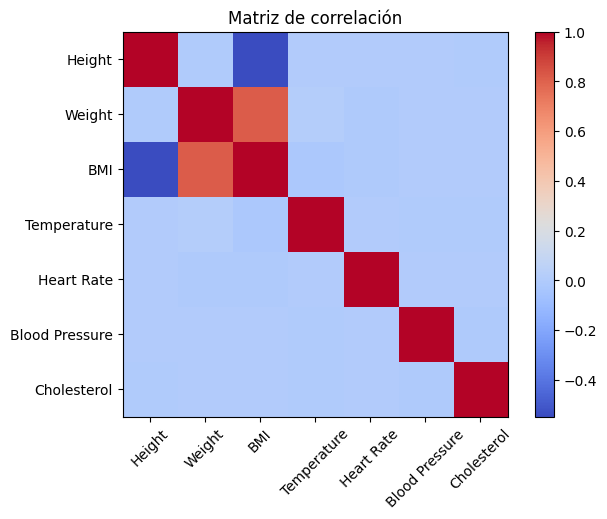

In [8]:
############################################
# SOLUCIÓN: Aplicación de técnicas EDA orientadas a determinar problemas de calidad en los datos
############################################

def exploracion_datos(data):
    # Resumen estadístico de los datos numéricos
    print("Resumen estadístico de variables numéricas:")
    print(data.describe())
    print("\n")
    
    # Resumen estadístico de los datos categóricos
    print("Resumen estadístico de variables categóricas:")
    print(data.describe(include=['object']))
    print("\n")
    
    # Visualizar valores únicos y sus conteos en variables de tipo objeto
    print("Valores únicos y conteos en variables categoricas:")
    for columna in data.columns:
        if pd.api.types.is_object_dtype(data[columna]) and columna not in ['Student ID', 'Birthdate']:
            print(f"Conteo de valores únicos en la columna {columna}:")
            print(data[columna].value_counts())
            print("\n")
    
    # Resumen estadístico de los datos categóricos
    print("Conteo de valores nulos por variables:")
    print(data.isnull().sum())

    # Densidad de datos
    print("Densidad de los datos en variables numericas:")
    int_vars = data.select_dtypes(include = ['int','float'])
    num_vars = int_vars.shape[1]
    num_rows = math.ceil(num_vars / 3)

    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,(num_rows*3)+1))
    axs = axs.flatten() 
    
    for i, var in enumerate (int_vars):
        sns.kdeplot(x=var,data=data,ax=axs[i])
    
    # Si hay más subplots que columnas, ocultar los subplots sobrantes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    # Visualización de la distribución de datos numéricos
    print("Distribución de variables numéricas:")
    
    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,(num_rows*3)+1))
    axs = axs.flatten()
    
    for i, var in enumerate (int_vars):
        data[var].plot(kind='hist',ax=axs[i])
        axs[i].set_title(var)
    # Si hay más subplots que columnas, ocultar los subplots sobrantes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    
    # Mapa de calor de valores faltantes
    print("Mapa de calor de valores faltantes:")
    sns.heatmap(data.isnull(), cbar=False)
    plt.show()

    # Boxplot de variables numéricas
    print("Boxplot de variables numéricas:")
   
    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,(num_rows*3)+1))
    axs = axs.flatten()

    for i, columna in enumerate(int_vars.columns):
        sns.boxplot(data=int_vars[columna], orient="h", ax=axs[i])
        #axs[i].set_title(f'Boxplot de {columna}')
    # Si hay más subplots que columnas, ocultar los subplots sobrantes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.show()

    # Matriz de correlación
    # Seleccionar solo las columnas numéricas
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])

    # Calcular la matriz de correlación
    correlation_matrix = numeric_columns.corr()

    # Crear una figura y un eje para la gráfica
    plt.figure(figsize=(7, 5))

    # Visualizar la matriz de correlación como un mapa de calor
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Matriz de correlación')
    plt.show()

# Llamada a la función de exploración de datos
exploracion_datos(data)

### Paso 2.2: Análisis-discusión del estado de calidad de los datos (1.5 puntos)

A continuación, comente (de forma textual, clara y consisa), variable por variable, los hallazgos encontrados por cada una: acerca de su naturaleza (distribución, centralidad y dispersión) y estado de calidad.

In [9]:
############################################
# Lista del estado de calidad de datos: variable por variable
############################################

"""
A nivel de los valores numéricos existe valores atipicos como por ejemplo BMI negativo o valores de temperatura muy por fuera de los rangos; 
 y estatura de mas de 350 se debe realizar el tratamiento para que los valores queden dentro de los rangos propuestos en la práctica.

En las variables categóricas existen 3775 estudiantes con dobles registros, se desestimará para este estudio dicha columna, pues se podría tratar de errores 
al ingresar la información.

En las columnas de categorías existen valores no normalizados en Genero, Country, Blood Type, Smoking donde algunos valores contienen espacios al inicio o puntos 
al final se debe realizar la normalización de estos valores para asegurar la consistencia y la coherencia en el análisis.

En las gráficas del boxplot se puede ver valores fuera de los bigotes, que se espera reducir con la limpieza de los datos atipicos.

"""


'\nA nivel de los valores numéricos existe valores atipicos como por ejemplo BMI negativo o valores de temperatura muy por fuera de los rangos; \n y estatura de mas de 350 se debe realizar el tratamiento para que los valores queden dentro de los rangos propuestos en la práctica.\n\nEn las variables categóricas existen 3775 estudiantes con dobles registros, se desestimará para este estudio dicha columna, pues se podría tratar de errores \nal ingresar la información.\n\nEn las columnas de categorías existen valores no normalizados en Genero, Country, Blood Type, Smoking donde algunos valores contienen espacios al inicio o puntos \nal final se debe realizar la normalización de estos valores para asegurar la consistencia y la coherencia en el análisis.\n\nEn las gráficas del boxplot se puede ver valores fuera de los bigotes, que se espera reducir con la limpieza de los datos atipicos.\n\n'

## Parte 3: Limpieza y transformación de datos (6.5 puntos)

<div style="background-color: 000000; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<b>Objetivos:</b>

- Limpiar los conjuntos de datos (para las variables que haya identificado problemas de calidad) de tal manera que no hayan elementos duplicados, ni hayan datos con valores faltantes e inesperados.
- Transformar las variables categóricas a Onehot encoding de tal manera que luego el dataset pueda ser usado en algoritmos predictivos. 

<b>Requisitos:</b>

- Eliminar variables innecesarias (por ejemplo, IDs) o transformar a numéricas (por ejemplo, transformar fecha de nacimiento a edad).
- Eliminar filas duplicadas (en caso de haber) o filas que tengan pocos datos (por ejemplo, menos del 50% de valores).
- Limpieza de atributos categóricos: quitar espacios o caracteres extra (como "." o espacios) y consolidar valores (en gender, country, blood type, etc.)
- Trasformar variables categóricas al formato Onehot encoding. Dejar al dataset transformado a números es fundamental para poder aplicar algunos métodos predictivos.
- Marcar datos inválidos con NaN, para ello hay que verificar el dominio de valores para blood type, temperature, BMI, etc., según lo indicado en la parte 2.1.
- Identificación y tratamiento de valores nulos y atípicos: aplicar el método más apropiado, de acuerdo con lo identificado y justificar.

<b>Salida esperada:</b> Al finalizar las tareas de limpieza imprima un extracto de los nuevos valores que quedan, luego de la limpieza.

</div>

In [10]:
######################
# SOLUCIÓN
######################
#funcion para comvertir columnas a binarias
def convertir_binarias(df, columna, cero, uno):
    try:
        # Mapear los valores de la columna a 0 o 1
        df.loc[:,columna] = df[columna].map({cero: 0, uno: 1})
    except  Exception as err:
        print(f"error, {err}")
    
    return df

#Funcion para calcular la edad en base a una fecha de toma de datos y una columna de un dfframe
def calcular_edad(df, fecha_toma_datos, nombre_columna):
    # Convertir la fecha de toma de datos al formato datetime si es una cadena
    if isinstance(fecha_toma_datos, str):
        fecha_toma_datos = pd.to_datetime(fecha_toma_datos)

    # Convertir la columna 'Birthdate' al tipo datetime
    df[nombre_columna] = pd.to_datetime(df[nombre_columna])

    # Calcular la edad restando la fecha de nacimiento a la fecha de toma de datos y dividiendo por el número de días en un año
    df['Age'] = (fecha_toma_datos - df[nombre_columna]).dt.days // 365

    return df

#Normaliza una columna a valores aceptados o estandarizados
def normalizar_columna(df, columna,valores):
     # Eliminar espacios
    df.loc[:, columna] = df[columna].str.strip()

    # Mapear los valores alternativos
    df.loc[:, columna] = df[columna].replace(valores)

    return df

#creara columnas binarias a partir de una columna OneHot manual
def generar_columnas_binarias(df, columna):
    # Obtener los nombres de las nuevas columnas binarias generadas
    nuevas_columnas = df[columna].dropna().unique()
    try:
        # Crear columnas binarias para cada categoría única en la columna original
        for col in nuevas_columnas:
            df.loc[:, col] = df[columna].apply(lambda x: 1 if x == col else (0 if pd.notna(x) else np.nan))
    except  Exception as err:
        print(f"error, {err}")

    return df

#Funcion para limpiar la df con la definicion brindada para datos normales
def normalizar_data(df):
    # Actualizar los valores fuera del rango especificado como NaN
    df.loc[df['Weight'] <= 40, 'Weight'] = np.nan
    df.loc[~df['Temperature'].between(97, 101), 'Temperature'] = np.nan
    df.loc[~df['BMI'].between(10, 45), 'BMI'] = np.nan
    df.loc[df['Cholesterol'] <= 120, 'Cholesterol'] = np.nan
    df.loc[df['Blood Pressure'] <= 90, 'Blood Pressure'] = np.nan
    df.loc[~df['Height'].between(120, 230), 'Height'] = np.nan
    try:
        # Homologar los valores de Blood Type
        blood_type_map = {'A+': 'A', 'A-': 'A', 'B+': 'B', 'B-': 'B', 'AB+': 'AB', 'AB-': 'AB', 'O+': 'O', 'O-': 'O', 'OR-': 'O', 'OR+': 'O', 'OR': 'O'}
        # Eliminar espacios al inicio y al final
        df.loc[:, 'Blood Type'] = df['Blood Type'].map(blood_type_map).fillna(df['Blood Type'])
        # Reemplazar los valores que no son 'A', 'B', 'AB', 'O' con NaN
        df.loc[:, 'Blood Type'] = df['Blood Type'].apply(lambda x: x if x in ['A', 'B', 'AB', 'O'] else np.nan)
    except  Exception as err:
        print(f"error, {err}")
    
    return df

#Funcion para limpiar los valores de las columnas eliminando espacios en blanco y puntos
def limpiar_columna(df, columna):
    try:
        # Eliminar espacios en blanco al inicio y al final de los valores
        df.loc[:, columna] = df[columna].str.strip()
        
        # Eliminar puntos al inicio o final de los valores
        df.loc[:, columna] = df[columna].str.strip('.')
    except  Exception as err:
        print(f"error, {err}")

    return df

# Eliminar la columna 'Student ID' del DataFrame data ya que no es un campo relevante
data.drop(columns=['Student ID'], inplace=True)

#Limpio la data eliminando espacios y puntos de las variables detectadas
data = limpiar_columna(data,'Country')
data = limpiar_columna(data,'Blood Type')
data = limpiar_columna(data,'Smoking')

#Normalizo la data aplicando los rangos para valores normales o aceptables
data = normalizar_data(data)
# Normalizar las columnas con valores atipicos
valores={'USA': 'U.S.A', 'Canada': 'Canadá', 'Perú': 'Peru', 'Mexico': 'México'}
data = normalizar_columna(data,'Country',valores)
valores={'Man': 'Male', 'man': 'Male', 'Women': 'Female'}
data = normalizar_columna(data,'Gender',valores)

#Agrego la edad para poder correlacionarla con el resto de valores numericos
data = calcular_edad(data, '2024-05-05', 'Birthdate')
# Generar columnas binarias para 'Gender'
#data = generar_columnas_binarias(data, 'Gender') 
# Convertir la columna 'Diabetes' en binaria
#data = convertir_binarias(data, 'Diabetes', 'No', 'Yes') 
# Convertir la columna 'Smoking' en binaria
#data = convertir_binarias(data, 'Smoking', 'No', 'Yes')
#Eliminar filas duplicadas
data.drop_duplicates()
# Calcular el umbral para el número de valores no NaN requeridos
umbral = len(data.columns) * 0.5
# Eliminar filas con menos del 50% de valores completos
data = data.dropna(thresh=umbral) 
# Llamada a la función de exploración de datos
#exploracion_datos(data)
# Presentar resumen de datos
data.describe()

,Birthdate,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Age
count,38739,38708.000000,38727.000000,38702.000000,38575.000000,38687.000000,37866.000000,38412.00000,38739.000000
mean,1998-06-09 02:51:52.955936,174.969532,69.966886,23.326113,98.603302,79.518908,114.986954,185.20327,25.427347
min,1990-01-01 00:00:00,150.000329,40.005792,10.074837,97.000697,60.000000,91.000000,121.00000,17.000000
25%,1994-03-04 00:00:00,162.401373,55.003453,17.826811,98.268642,70.000000,103.000000,153.00000,21.000000
50%,1998-05-29 00:00:00,174.920573,69.956373,22.609475,98.603641,79.000000,115.000000,185.00000,25.000000
75%,2002-09-06 00:00:00,187.551584,85.015906,27.982601,98.940955,90.000000,127.000000,217.00000,30.000000
max,2006-12-31 00:00:00,199.995462,99.995744,44.288003,100.824857,99.000000,139.000000,249.00000,34.000000
std,NaN,14.455925,17.349985,7.050056,0.498513,11.554259,14.140699,37.20379,4.929322


       Birthdate      Height     Weight        BMI  Temperature  Heart Rate  \
0     1993-03-13  179.868610  54.139870  16.734258    98.427152        98.0   
1     2001-08-19  161.485349  50.041326  19.189451    98.422948        96.0   
2     1990-02-24  174.798383  92.867455  30.394060    98.947801         NaN   
3     1990-12-28         NaN  76.559412  19.704432    98.665552        74.0   
4     1991-08-27  191.895627  56.587357        NaN    97.920941        71.0   
...          ...         ...        ...        ...          ...         ...   
13595        NaT         NaN        NaN        NaN          NaN         NaN   
14227        NaT         NaN        NaN        NaN          NaN         NaN   
16387        NaT         NaN        NaN        NaN          NaN         NaN   
24268        NaT         NaN        NaN        NaN          NaN         NaN   
37875        NaT         NaN        NaN        NaN          NaN         NaN   

       Blood Pressure  Cholesterol   Age  Gender_Fe

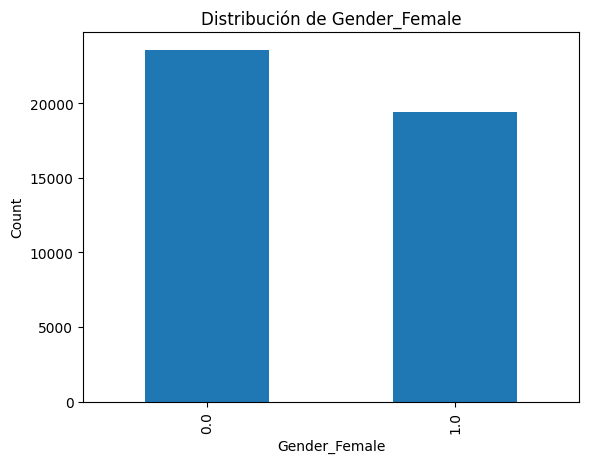

Distribución de la columna Gender_Male:
Gender_Male
0.0    23771
1.0    19262
Name: count, dtype: int64


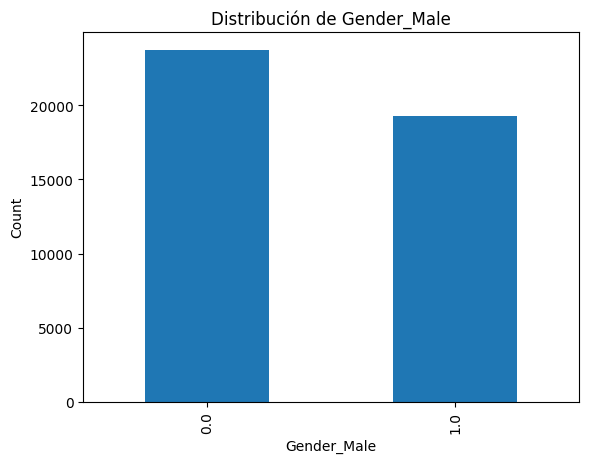

Distribución de la columna Gender_missing:
Gender_missing
0.0    38688
1.0     4345
Name: count, dtype: int64


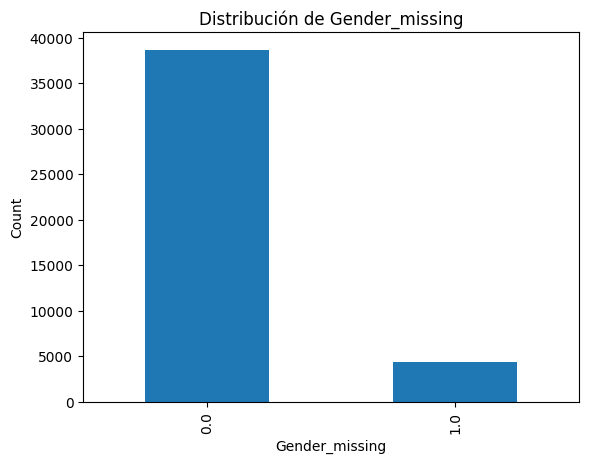

Distribución de la columna Country_Argentina:
Country_Argentina
0.0    40029
1.0     3004
Name: count, dtype: int64


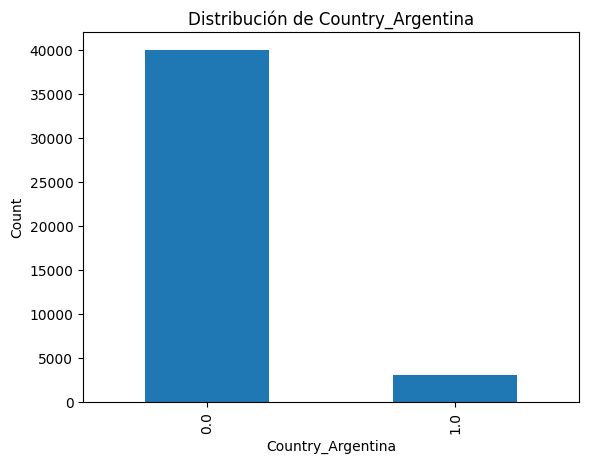

Distribución de la columna Country_Canadá:
Country_Canadá
0.0    38298
1.0     4735
Name: count, dtype: int64


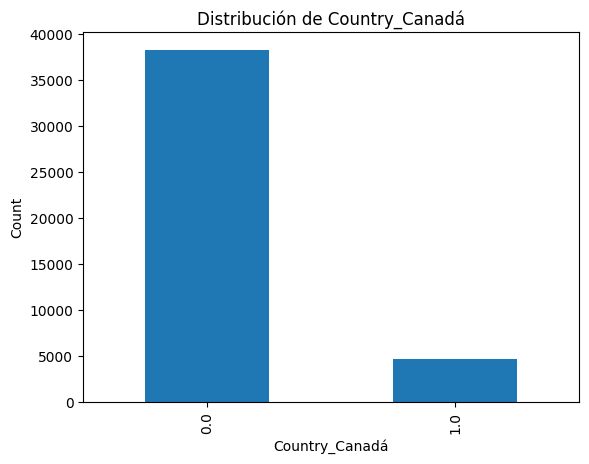

Distribución de la columna Country_Colombia:
Country_Colombia
0.0    39590
1.0     3443
Name: count, dtype: int64


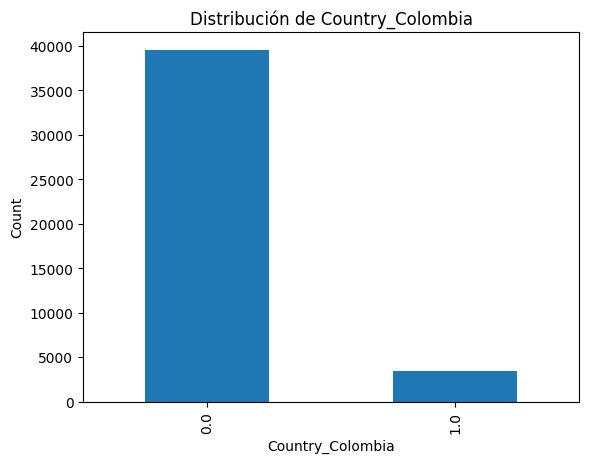

Distribución de la columna Country_Ecuador:
Country_Ecuador
0.0    40019
1.0     3014
Name: count, dtype: int64


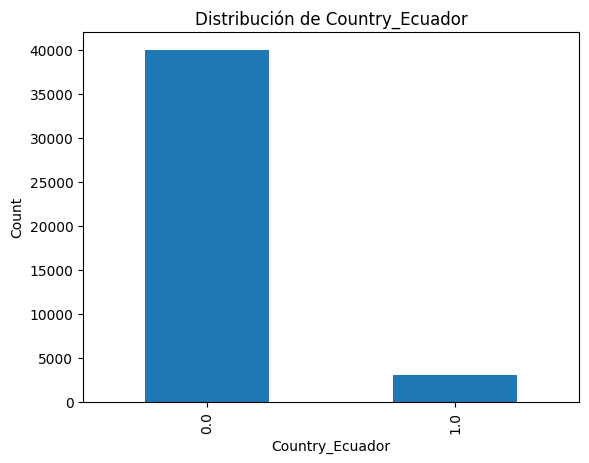

Distribución de la columna Country_México:
Country_México
0.0    38298
1.0     4735
Name: count, dtype: int64


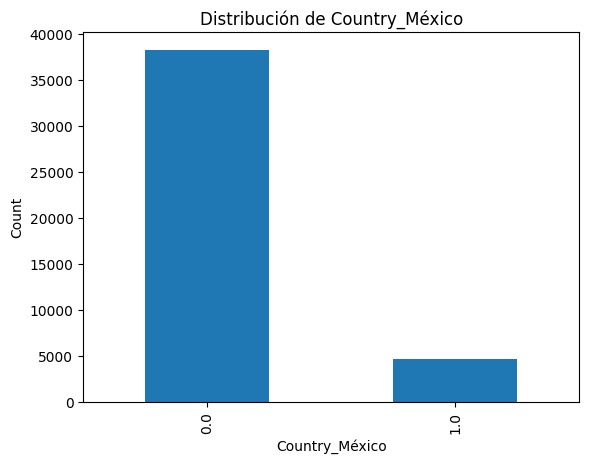

Distribución de la columna Country_Peru:
Country_Peru
0.0    40234
1.0     2799
Name: count, dtype: int64


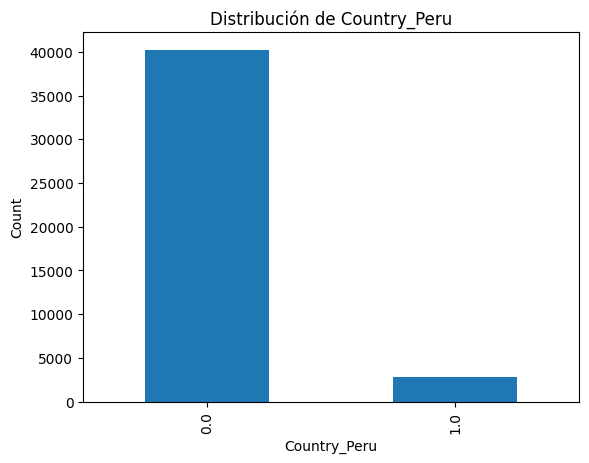

Distribución de la columna Country_U.S.A:
Country_U.S.A
0.0    24959
1.0    18074
Name: count, dtype: int64


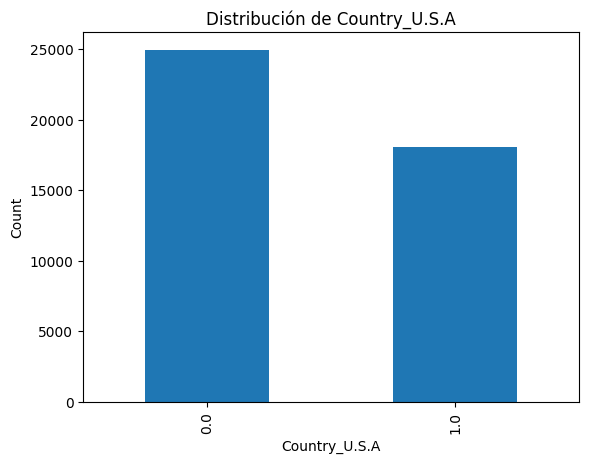

Distribución de la columna Country_Venezuela:
Country_Venezuela
0.0    39804
1.0     3229
Name: count, dtype: int64


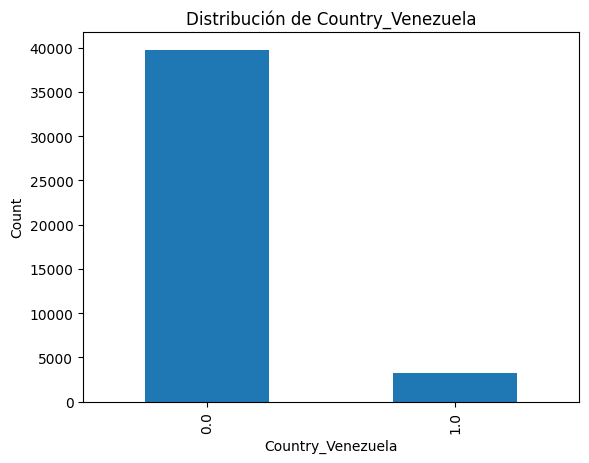

Distribución de la columna Blood Type_A:
Blood Type_A
0.0    33522
1.0     9511
Name: count, dtype: int64


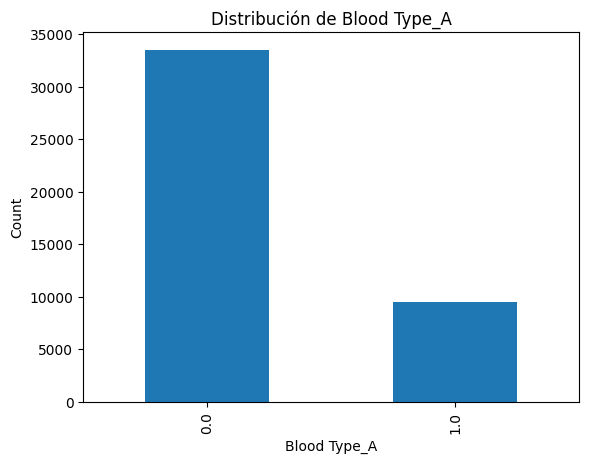

Distribución de la columna Blood Type_AB:
Blood Type_AB
0.0    33475
1.0     9558
Name: count, dtype: int64


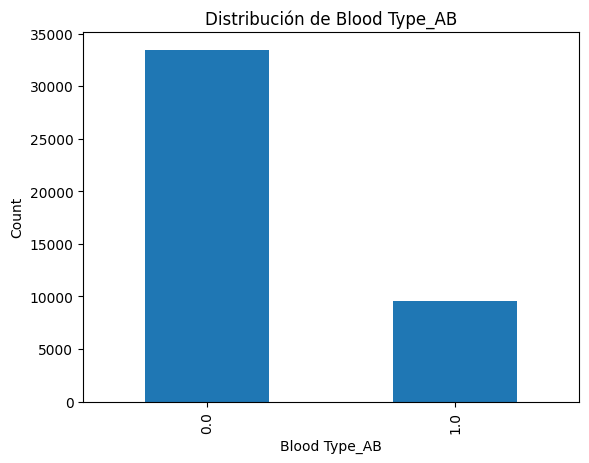

Distribución de la columna Blood Type_B:
Blood Type_B
0.0    33175
1.0     9858
Name: count, dtype: int64


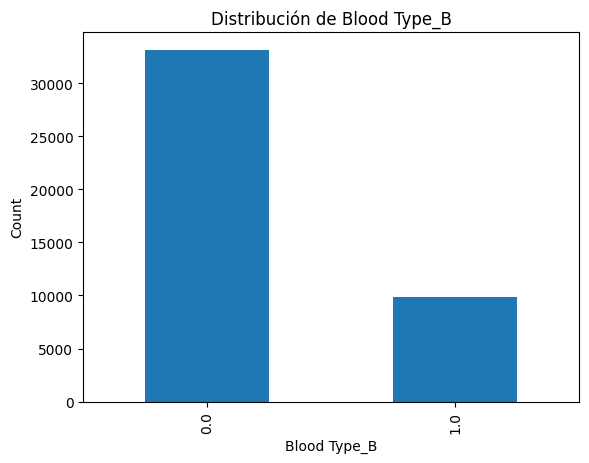

Distribución de la columna Blood Type_O:
Blood Type_O
0.0    33311
1.0     9722
Name: count, dtype: int64


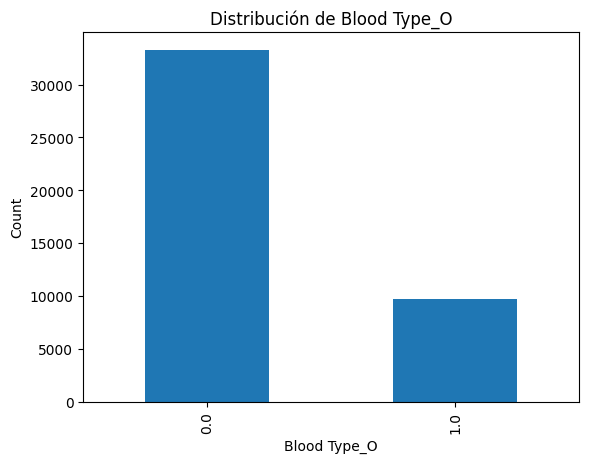

Distribución de la columna Blood Type_missing:
Blood Type_missing
0.0    38649
1.0     4384
Name: count, dtype: int64


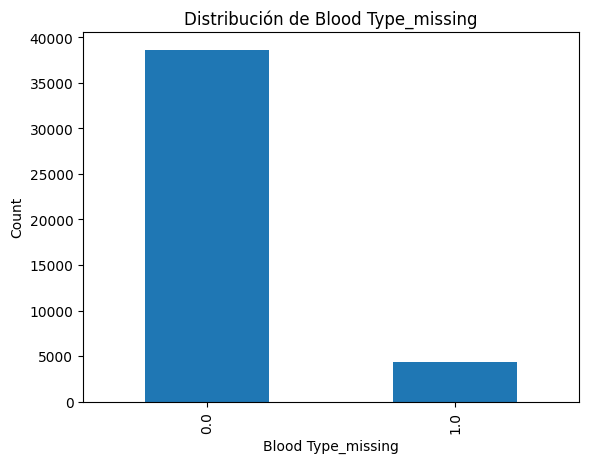

Distribución de la columna Diabetes_No:
Diabetes_No
1.0    34881
0.0     8152
Name: count, dtype: int64


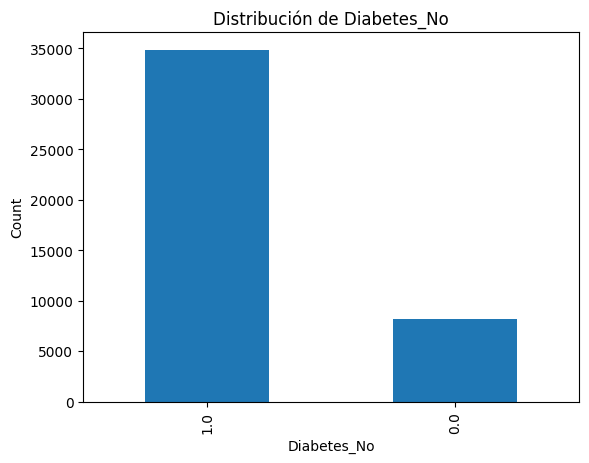

Distribución de la columna Diabetes_Yes:
Diabetes_Yes
0.0    39177
1.0     3856
Name: count, dtype: int64


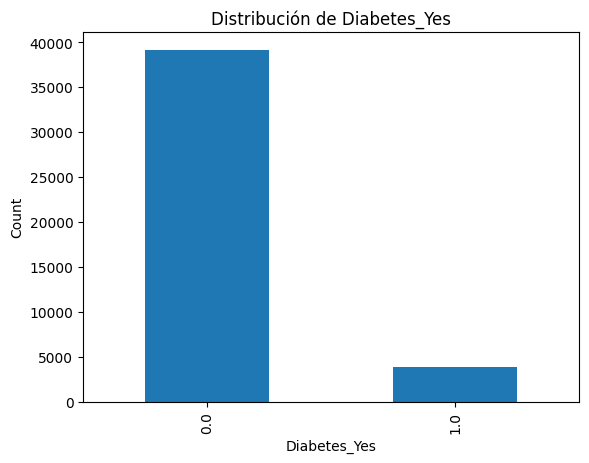

Distribución de la columna Diabetes_missing:
Diabetes_missing
0.0    38737
1.0     4296
Name: count, dtype: int64


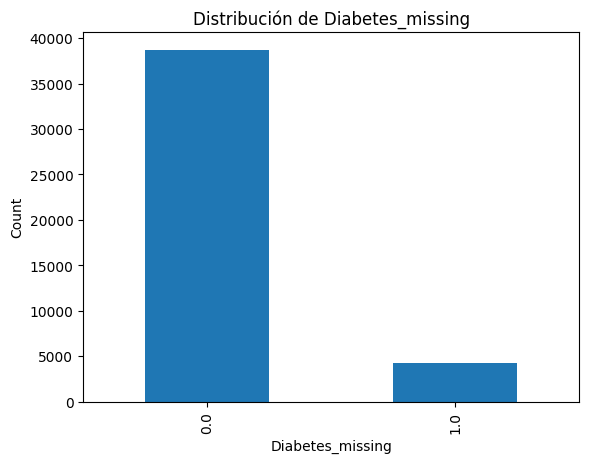

Distribución de la columna Smoking_No:
Smoking_No
1.0    30954
0.0    12079
Name: count, dtype: int64


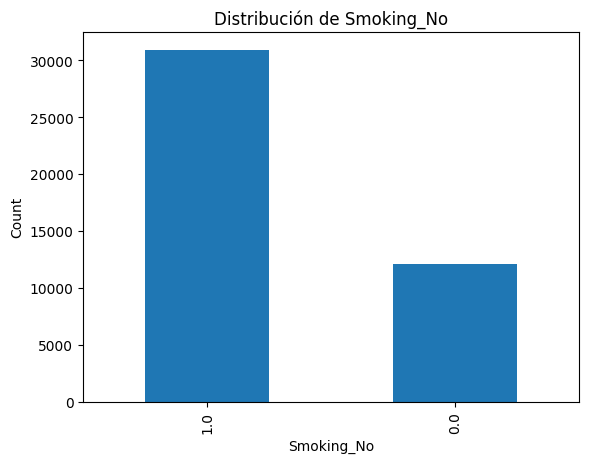

Distribución de la columna Smoking_Yes:
Smoking_Yes
0.0    35314
1.0     7719
Name: count, dtype: int64


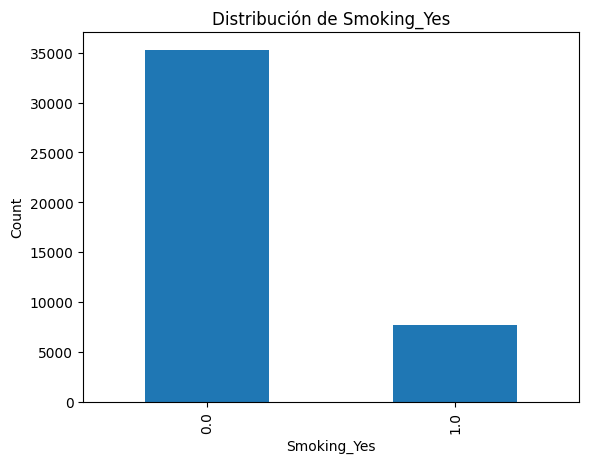

Distribución de la columna Smoking_missing:
Smoking_missing
0.0    38673
1.0     4360
Name: count, dtype: int64


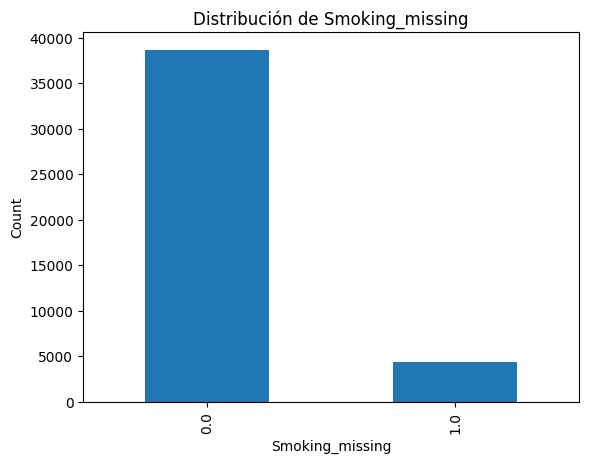

In [11]:
# OneHot Encoder
data1 = data.copy()
# Seleccionar columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Imputar valores NaN con 'missing'
data[categorical_columns] = data[categorical_columns].fillna('missing')

# Codificar las columnas categóricas
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenar las columnas codificadas con las otras columnas
data_encoded = pd.concat([data.drop(columns=categorical_columns), one_hot_data], axis=1)

# Mostrar el DataFrame resultante
print(data_encoded)

# Graficar la distribución de las nuevas columnas one-hot codificadas
for col in one_hot_data.columns:
    print(f"Distribución de la columna {col}:")
    print(one_hot_data[col].value_counts(dropna=False))
    one_hot_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<div style="background-color: #000000; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<b> Ejercicio opcional.</b>

Considerando la distribución de cada variable categórica (luego de la limpieza y antes de la codificación Onehot encoding), verifique la frecuencia relativa (%) de cada uno de sus valores, y para todas las categorías que no tengan más del 7% de presencia en todo el dataset, agrupe esos valores en la categoría <b>"Other"</b>. 

<b>Salida esperada:</b> Por cada variable categórica, presente un resumen de sus valores (como gráfico o como tabla de frecuencias) donde se verifique que se ha creado la categoría Other.

</div>


Frecuencia relativa de categorías en Gender:
Gender
Female    50.211952
Male      49.788048
Name: proportion, dtype: float64


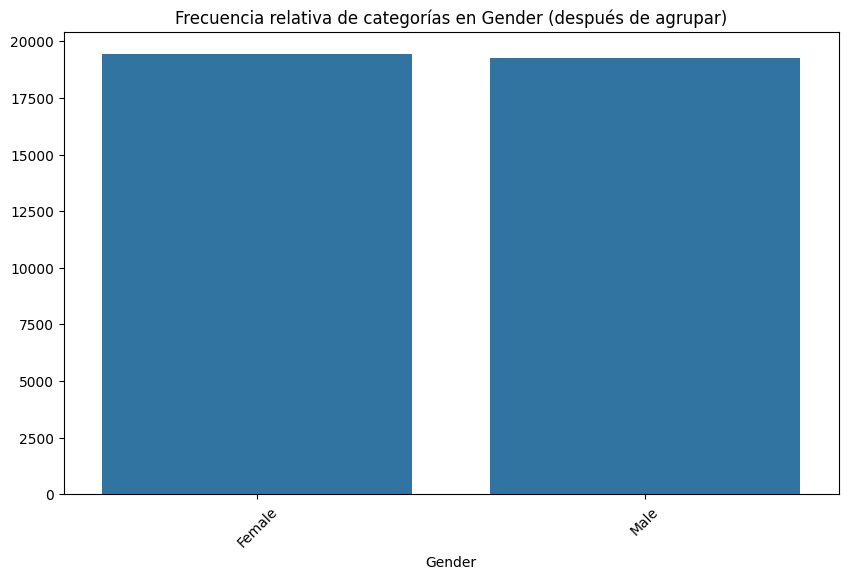


Frecuencia relativa de categorías en Country:
Country
U.S.A        42.000325
Other        13.485000
Canadá       11.003184
México       11.003184
Colombia      8.000837
Venezuela     7.503544
Ecuador       7.003927
Name: proportion, dtype: float64


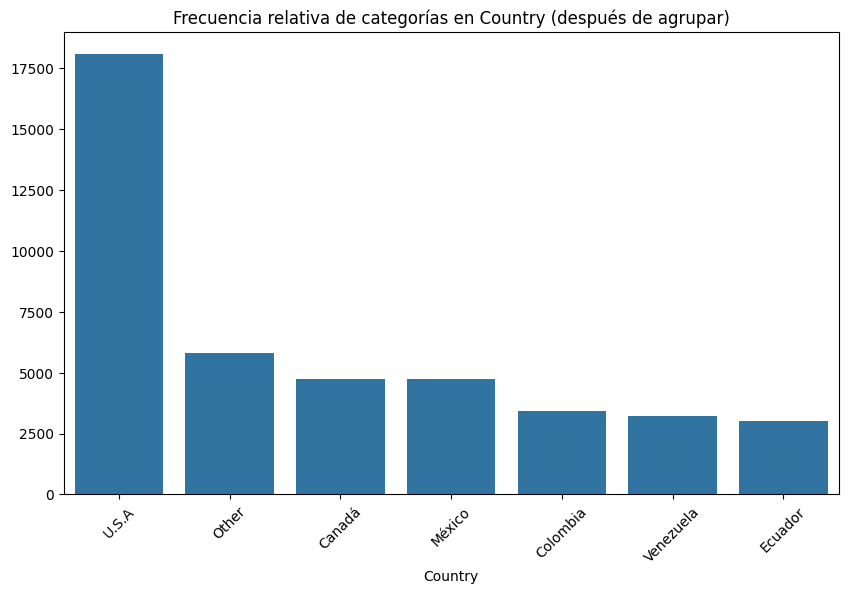


Frecuencia relativa de categorías en Blood Type:
Blood Type
B     25.506481
O     25.154596
AB    24.730265
A     24.608657
Name: proportion, dtype: float64


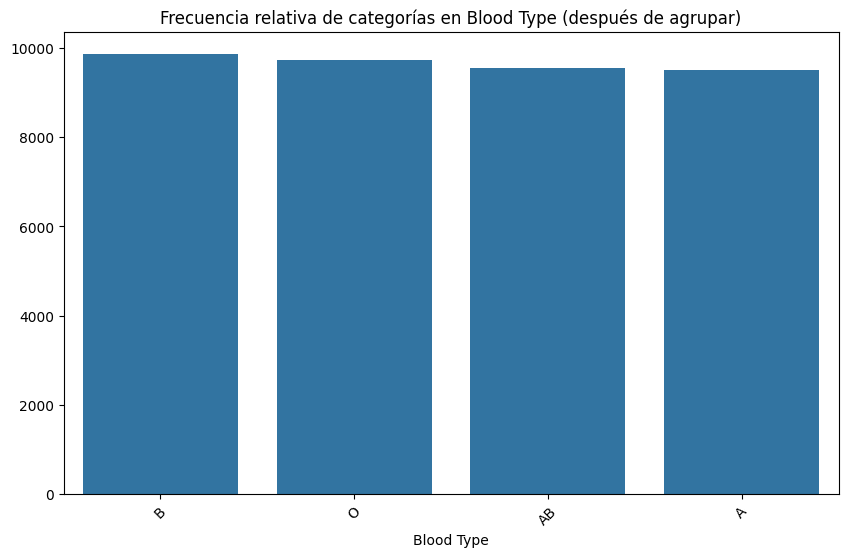


Frecuencia relativa de categorías en Diabetes:
Diabetes
No     90.045693
Yes     9.954307
Name: proportion, dtype: float64


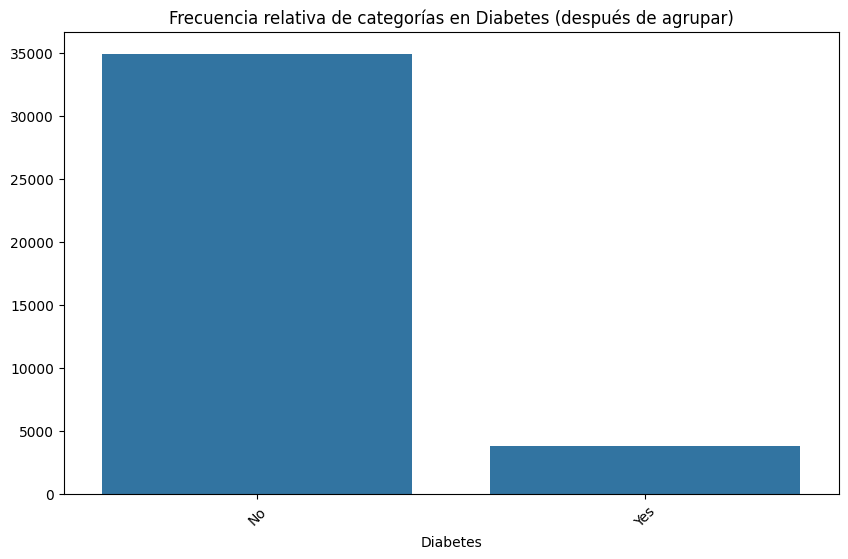


Frecuencia relativa de categorías en Smoking:
Smoking
No     80.040338
Yes    19.959662
Name: proportion, dtype: float64


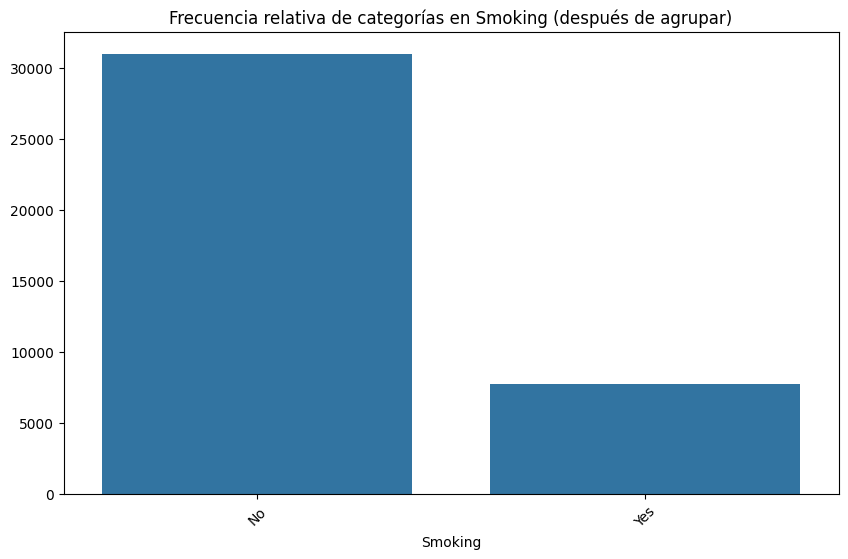

   Birthdate  Gender Country      Height     Weight Blood Type        BMI  \
0 1993-03-13  Female   U.S.A  179.868610  54.139870        NaN  16.734258   
1 2001-08-19    Male   U.S.A  161.485349  50.041326          A  19.189451   
2 1990-02-24     NaN   U.S.A  174.798383  92.867455          B  30.394060   
3 1990-12-28  Female   U.S.A         NaN  76.559412          B  19.704432   
4 1991-08-27  Female   U.S.A  191.895627  56.587357          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking   Age  
0    98.427152        98.0           125.0        221.0       No     Yes  31.0  
1    98.422948        96.0           130.0        175.0      NaN      No  22.0  
2    98.947801         NaN           126.0        148.0       No      No  34.0  
3    98.665552        74.0           119.0        230.0       No     Yes  33.0  
4    97.920941        71.0           116.0        219.0       No     NaN  32.0  


In [12]:
######################
# SOLUCIÓN
######################
# Identificar las columnas categóricas (antes de la codificación One-Hot)
categorical_columns=data1.select_dtypes(include=['object']).columns.tolist()
 
# Función para agrupar categorías poco frecuentes
def group_rare_categories(df, column, threshold=0.07):
    # Calcular la frecuencia relativa
    frequencies = df[column].value_counts(normalize=True)
   
    # Identificar las categorías con frecuencia menor al threshold
    rare_categories = frequencies[frequencies < threshold].index
   
    # Reemplazar las categorías raras con 'Other'
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_categories else x)
   
    # Visualizar las frecuencias relativas
    print(f'\nFrecuencia relativa de categorías en {column}:')
    print(df[column].value_counts(normalize=True) * 100)
   
    # Graficar las frecuencias después de agrupar
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
    plt.title(f'Frecuencia relativa de categorías en {column} (después de agrupar)')
    plt.xticks(rotation=45)
    plt.show()
 
 
# Aplicar la función a cada columna categórica
for col in categorical_columns:
    group_rare_categories(data1, col)
 
# Mostrar una muestra de los datos transformados
print(data1.head())

<div style="background-color: #000000; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<b> Ejercicio opcional.</b>

- Cuando haya finalizado la aplicación de las tareas de limpieza, aplique una técnica de escalado de datos sobre todas las variables numéricas del dataset (menos las que resultaron de la conversión a Onehot encoding).


<b>Salida esperada:</b> Presente un sample del nuevo dataframee escalado, donde se demuestre que las variables trasformadas mediante Onehot encoding permanecen sin escalar, y el resto sí.

</div>

In [13]:
######################
# SOLUCIÓN
######################
from sklearn.preprocessing import StandardScaler
# Seleccionar las columnas categóricas y numéricas
categorical_columns = data1.select_dtypes(include=['object']).columns
numerical_columns = data1.select_dtypes(include=['number']).columns

# Aplicar escalado a las columnas numéricas
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(data1[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

# Concatenar las columnas escaladas y las columnas OneHotEncoded
scaled_data = pd.concat([scaled_numerical_df.reset_index(drop=True), data_encoded.reset_index(drop=True)], axis=1)

# Mostrar un sample del nuevo DataFrame escalado
print("Sample del nuevo DataFrame escalado:")
print(scaled_data.head())

Sample del nuevo DataFrame escalado:
     Height    Weight       BMI  Temperature  Heart Rate  Blood Pressure  \
0  0.338902 -0.912233 -0.935020    -0.353355    1.599525        0.708111   
1 -0.932791 -1.148463 -0.586764    -0.361789    1.426427        1.061705   
2 -0.011840  1.319936  1.002551     0.691062         NaN        0.778829   
3       NaN  0.379978 -0.513716     0.124873   -0.477658        0.283798   
4  1.170891 -0.771165       NaN    -1.368810   -0.737305        0.071641   

   Cholesterol       Age  Birthdate      Height  ...  Blood Type_AB  \
0     0.962192  1.130526 1993-03-13  179.868610  ...            0.0   
1    -0.274257 -0.695307 2001-08-19  161.485349  ...            0.0   
2    -0.999999  1.739136 1990-02-24  174.798383  ...            0.0   
3     1.204106  1.536266 1990-12-28         NaN  ...            0.0   
4     0.908434  1.333396 1991-08-27  191.895627  ...            0.0   

   Blood Type_B  Blood Type_O  Blood Type_missing  Diabetes_No  Diabetes_Yes  \

In [14]:
# Convertir a formato HTML.
#!jupyter nbconvert --pdf Lab2_Preprocesamiento-datos.ipynb